# <h1><center>Course: Introduction to Machine Learning</center></h1>
# <h1><center>Assigment 2</center></h1>
## <h1><center>Important NOTE: In order to get full grades, for every question, you need to provide the details of your work on how to get to a solution or the end of the proof</center></h1>
### <h1><center>Instructor: Tan Bui-Thanh</center></h1>
### <h1><center>TA: Hai Nguyen</center></h1>
#### <h1><center>Due day: 11:00 pm, Thursday, 20 September, 2022 </center></h1>
### If you gonna use this jupyter notebook for the assignment, please convert to .pdf file for submission. All submission must be in pdf format except codes.


## **Question 1** (Linear regression + regularization techniques + data augmentation) (+50)

In this problem, we approximate the polynomial from noisy data points. To that end, we generate a data pair $(x^{(i)}, y^{(i)})$ from the following noise-corrupted relation  

$$ y^{(i)} = .5 - {x^{(i)}} - .5 {x^{(i)}}^2 - 2 {x^{(i)}}^3 + 5 {x^{(i)}}^4 + \delta \varphi^{(i)} x^{(i)}$$
of the following  ground truth function
$$ y = .5 - {x} - .5 {x}^2 - 2 {x}^3 + 5 {x}^4$$

where $\delta = 0.05$ is the noise level, $\varphi$ is drawn from standard normal distribution. We need to generate 8 holdout samples and 7 training samples.

- (1.a) (+5) Fill the generating data code and produce figures to visualize data and true functions.
- (1.b) (+5) Perform the LinearRegression() using polynomial approximation of order of 1, 10 and 4. Visualizing each cases to see which case are overfitting, underfitting and good fit. Adding the mean square error of the holdout data to support your observation.
- (1.c) (+10) For overfitting senario, applying L2 regularization. You need to do: 
    + step 1: Plot the L2 regularization model versus no regularization model versus the ground truth function in one plot to see how L2 works (pick a reasonable $\lambda$).
    + step 2: Plot the mean square error of holdout data as a function of the regularization parameter $\lambda$ over the range $\lambda \in [10^{-5},10]$. What is the optimal $\lambda$ approximately? 
    + step 3: Using L-curved technique (read [https://www.sintef.no/globalassets/project/evitameeting/2005/lcurve.pdf]) to find out the optimal $\lambda$. The L-curved line is the one represents the relationship between residual norm $||y - f(x,\theta)||_2$ and solution norm $||\theta||_2$. Plot the L-curve and compare the optimal values of $\lambda$ from step 2 and step 3?
- (1.d) (+10) For overfitting senario, applying L1 regularization. Repeat the all 3 steps in the question (1.c).
- (1.e) (+10) For overfitting senario, applying Elasticnet regularization (a mixture of L1 and L2), i.e., the loss function with Elasticnet regularization is 
$$ J(\theta) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, \theta^\top x^{(i)}) + \lambda \cdot ||\theta||_1 + \frac{1}{2} \gamma ||\theta||_2^2$$

We are interested in the performance of the mean square error of the holdout data as a function of $\lambda$ and $\gamma$. One way to achieve this is to plot the contour of the mean square error of the holdout data as a function of $\lambda$ and $\gamma$. Discuss the relationship between Elasticnet and L2, L1 regularization?

- (1.g) (bonous +10) The question is **can we do something else** and yet achieve the same regularization effect? One way to accomplish this is via **data augmentation technique**. The data augmentation technique that we study consists of 4 steps:
    + step 1: Clone 7 training data samples (X in the code) into 350 samples (using numpy.repeat). (Note: this is noise-free data).
    + step 2: We add noise these 350 samples by $$\tilde{x}^i = x^i + \delta \varphi^i,$$ where $\varphi^i$ is drawn from standard normal distribution. We get X_data_augmented.
    + step 3: Similarly, clone 7 training label data into 350 samples (using numpy.repeat), denoted y_data_augmented. 
    + step 4: Using Linearregression to train using data augmented data pairs (X_data_augmented, y_data_augmented).

    You need to (1) generate augmented data, (2) Determine a good noise level $\delta$ by trying different values of $\delta$? Explain why too much or too small noise is not good? To answer the last question, you may need to read the folllowing references
    1. Train Neural Networks With Noise to Reduce Overfitting, [https://machinelearningmastery.com/train-neural-networks-with-noise-to-reduce-overfitting/]
    2. [https://arxiv.org/abs/2208.04995]

In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import pandas as pd
from sklearn import datasets
np.random.seed(0)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso, LogisticRegression

## please keep the below codes for generating x, DO NOT CHANGE!
# ==========================================================================================
# holdout samples
n_holdout_samples = 8
X_holdout = np.sort(np.random.rand(n_holdout_samples)) 

# Training samples
n_samples = 7
X = np.sort(np.random.rand(n_samples)) 
# ==========================================================================================

# [CONTINUE YOUR WORK FROM HERE!]



## **Question 2** (Logistic regression) (+50)

In this problem, we will use regression to classify two types of iris flowers ('Iris Versicolour', 'Iris Virginica') based on 4 features (petal length, petal width, sepal length, sepal width). Recall that for linear regression our model class is given as
$$
z = \theta^T x.
$$
where $\theta = \{\theta_0, ..., \theta_n\}$, and $x = \{1, x_1, ..., x_n\}$ with $n$ as the number of input attributes/features.
We define the probability of prediction y of the model class given x feature set reads
$$
p(y|x) = \frac{1}{1 + e^{-z}}.
$$
For logistic regression, we need to define a loss function (to accommodate the nature of the classification problem). We choose to use the cross entropy loss which is given as
$$
\mathcal{L}(\theta) = \sum_{i=1}^{N} y^{(i)} \, log(p(y|x)^{(i)}) + (1 - y^{(i)}) \, log(1 - p(y|x)^{(i)})
$$
where $y^{(i)}$ is the label of i*th* flower. y = 0 for 'Iris Versicolour' type and $y = 1$ for 'Iris Virginica' type. And, N is number of train samples.

We pick N = 80 for training data, and the holdout data of 20 samples, given by the code below.

1. (+10) Derive the gradient expression of the loss function for logistic regression.
2. (+10) Performing Logistic regression using the gradient descent codes that you wrote in the first homework. Plot your classfication on the testing data and report the percentage of misclassifications (circling the wrong prediction point with figure in 2.a, see lecture 1 for diabetes risk example).
3. (+15) Performing Logistic regression with L2 regularization using the gradient descent codes that you wrote in the first homework. Plot your classfication on the testing data and report the percentage of misclassifications.
4. (+5) Performing Logistic regression, using scikit-learn function [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html] compare the results with question 2.
5. (+5) Performing Logistic regression with L2 regularization , using scikit-learn function [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html], compare the results with question 3.
6. (+5) Comparing the number of wrongly predicted points from part 2 and part 3. Discuss the reason for your answer.


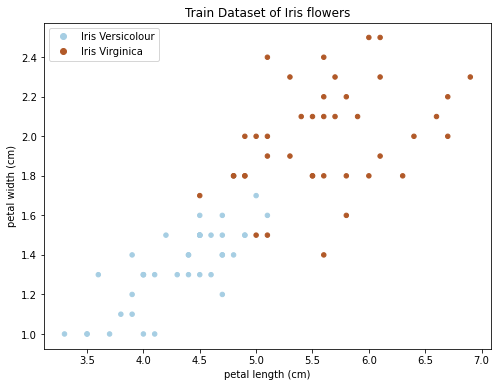

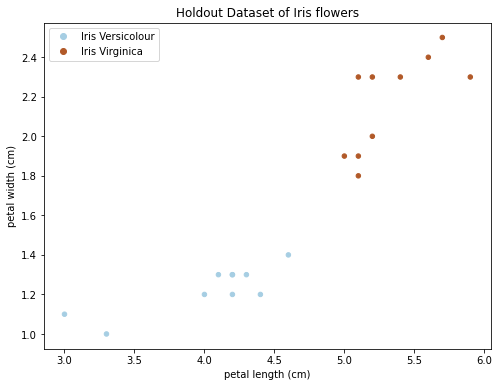

In [40]:
from sklearn import datasets

# Load and visualize the Iris flower dataset
iris = datasets.load_iris()
iris.target[50:100] = 0
iris.target[100:150] = 1
X = np.concatenate((iris.data[50:90], iris.data[100:140]), axis = 0)
y = np.concatenate((iris.target[50:90], iris.target[100:140]), axis = 0)

X_holdout = np.concatenate((iris.data[90:100], iris.data[140:150]), axis = 0)
y_holdout = np.concatenate((iris.target[90:100], iris.target[140:150]), axis = 0)

# # Visualize data
# plt.figure(figsize=(8,6))
# p1 = plt.scatter(X[:,2], X[:,3], alpha=1, c=y, cmap='Paired', s=20)
# plt.ylabel("petal width (cm)")
# plt.xlabel("petal length (cm)")
# plt.title("Train Dataset of Iris flowers")
# plt.legend(handles=p1.legend_elements()[0], labels=['Iris Versicolour', 'Iris Virginica'])
# plt.show()

# # Visualize data
# plt.figure(figsize=(8,6))
# p1 = plt.scatter(X_holdout[:,2], X_holdout[:,3], alpha=1, c=y_holdout, cmap='Paired', s=20)
# plt.ylabel("petal width (cm)")
# plt.xlabel("petal length (cm)")
# plt.title("Holdout Dataset of Iris flowers")
# plt.legend(handles=p1.legend_elements()[0], labels=['Iris Versicolour', 'Iris Virginica'])